# Import necessary libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,accuracy_score
from scipy import stats

# Load the dataset


In [2]:
df = pd.read_csv("Boston.csv").drop(columns=['Unnamed: 0'])


In [3]:
df.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# Step 1: Exploratory Data Analysis (EDA)


In [4]:
# Check basic statistics of the dataset
df.describe()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
# Check for missing values
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

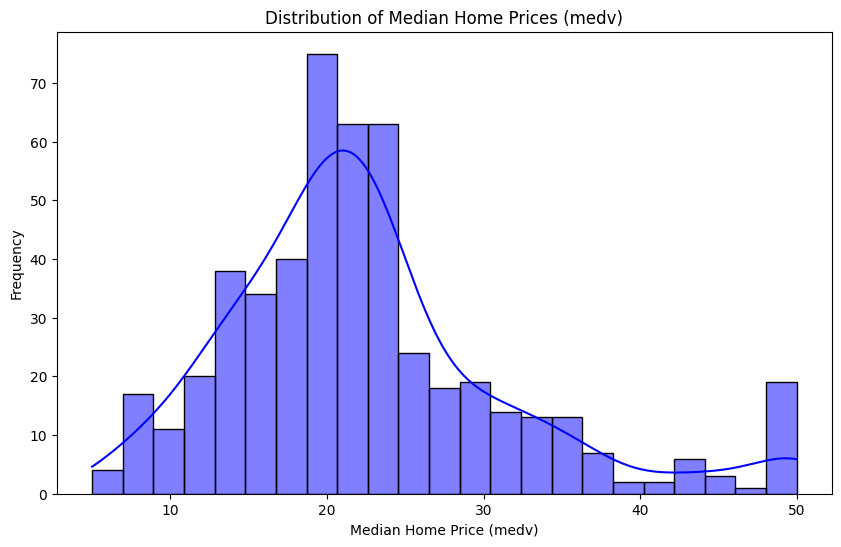

In [6]:
# Visualize the distribution of the target variable (medv)
plt.figure(figsize=(10, 6))
sns.histplot(df['medv'], kde=True, color='blue')
plt.title('Distribution of Median Home Prices (medv)')
plt.xlabel('Median Home Price (medv)')
plt.ylabel('Frequency')
plt.show()

# Step 2: Handle Outliers


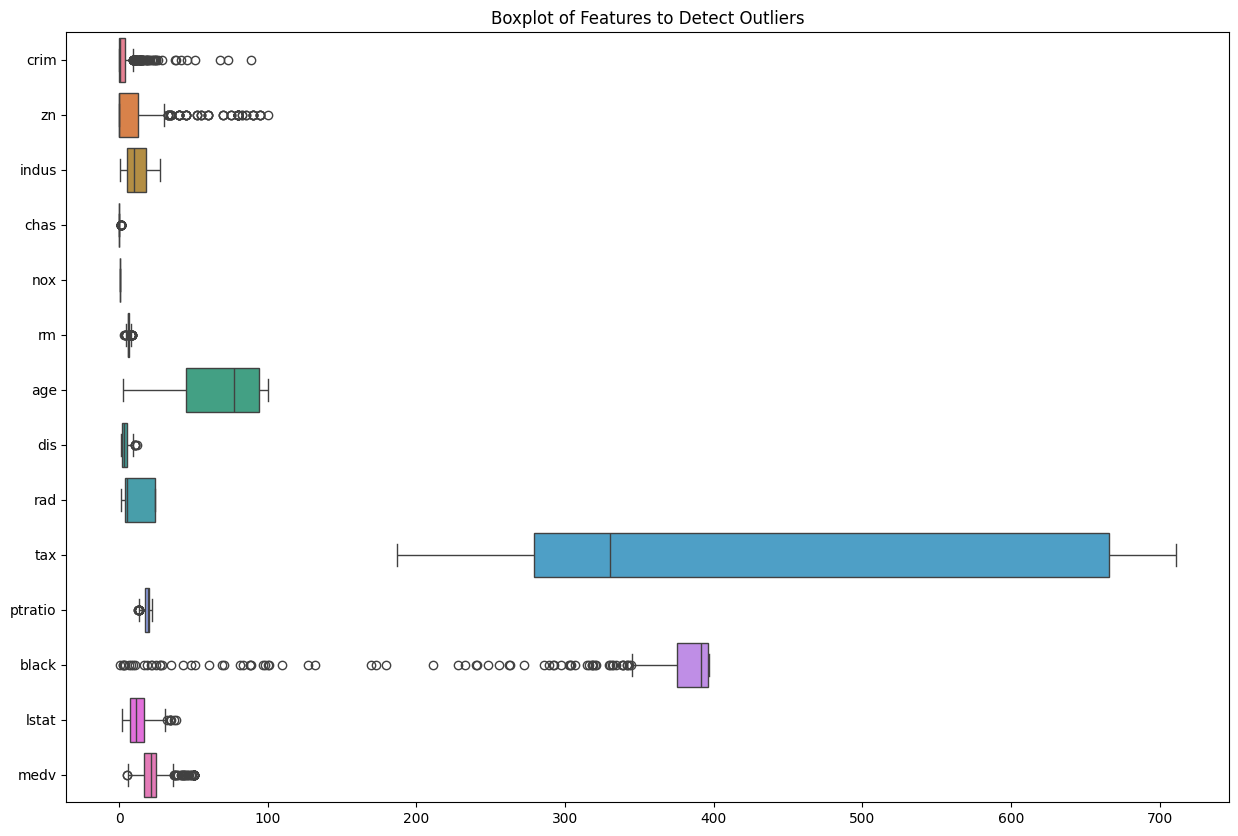

In [7]:
# Visualize outliers using boxplots
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, orient='h')
plt.title('Boxplot of Features to Detect Outliers')
plt.show()

In [8]:
# Remove outliers using Z-score method
z_scores = np.abs(stats.zscore(df))
df_cleaned = df[(z_scores < 3).all(axis=1)]

In [9]:
# Compare original and cleaned dataset sizes
print(f"Original dataset size: {df.shape}")
print(f"Cleaned dataset size (after removing outliers): {df_cleaned.shape}")

Original dataset size: (506, 14)
Cleaned dataset size (after removing outliers): (415, 14)


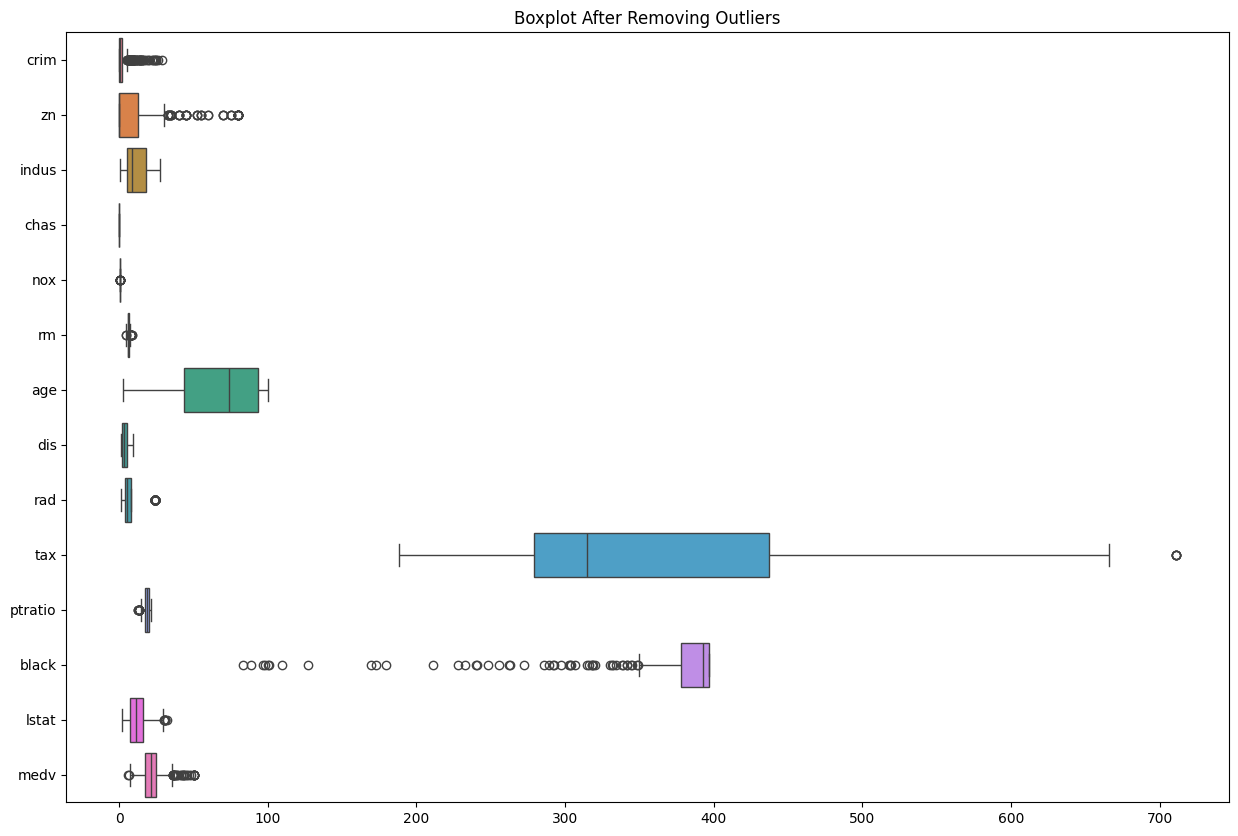

In [10]:
# Visualize the cleaned dataset
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_cleaned, orient='h')
plt.title('Boxplot After Removing Outliers')
plt.show()

# Step 3: Feature Correlation Analysis


In [11]:
# Compute correlation matrix
corr_matrix = df_cleaned.corr()

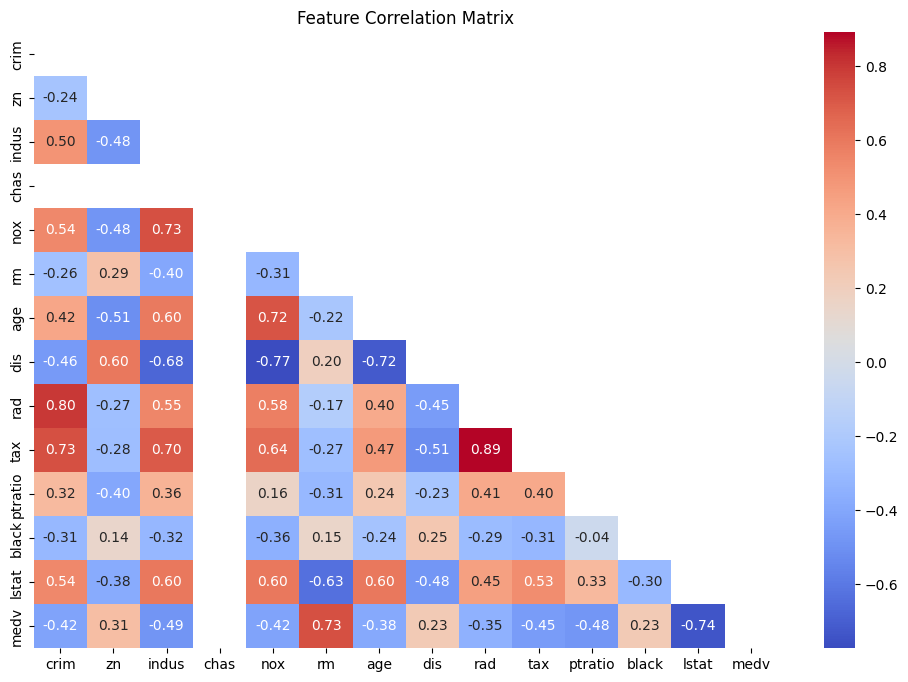

In [12]:
# Visualize correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            mask=np.triu(np.ones_like(corr_matrix, dtype=bool)))
plt.title('Feature Correlation Matrix')
plt.show()

<Figure size 1200x800 with 0 Axes>

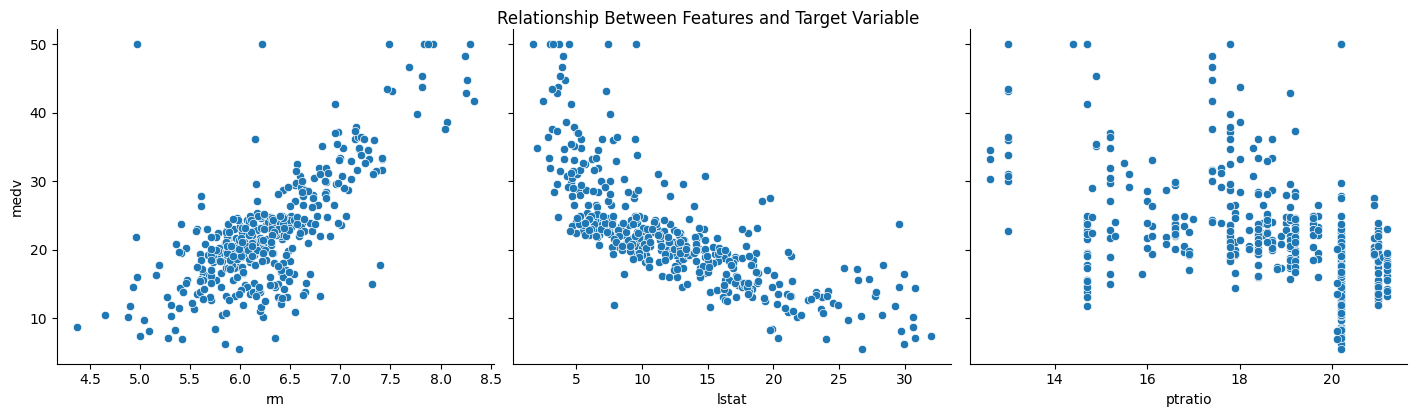

In [13]:
# Visualize relationships between features and target variable
plt.figure(figsize=(12, 8))
sns.pairplot(df_cleaned, x_vars=['rm', 'lstat', 'ptratio'], y_vars=['medv'], 
             kind='scatter', height=4, aspect=1.2)
plt.suptitle('Relationship Between Features and Target Variable', y=1.02)
plt.show()

# Step 4: Data Preprocessing


In [14]:
# Split the data into features (X) and target (y)
X = df_cleaned.drop(columns=['medv'])
y = df_cleaned['medv']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Model Training and Evaluation


In [15]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    # Evaluate model performance
    metrics = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R²': r2_score(y_test, y_pred)
    }
    results[name] = metrics
    
    # Print evaluation metrics
    print(f"\n{name} Performance:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")

# Compare model performance
results_df = pd.DataFrame(results).T
results_df


Linear Regression Performance:
MAE: 2.4945
MSE: 10.6214
RMSE: 3.2591
R²: 0.7761

Random Forest Performance:
MAE: 1.8679
MSE: 5.9914
RMSE: 2.4477
R²: 0.8737


,MAE,MSE,RMSE,R²
Linear Regression,2.494487,10.621446,3.259056,0.776117
Random Forest,1.867904,5.991356,2.447725,0.873712


# Step 6: Feature Importance (Random Forest)


C:\Users\abdo\AppData\Local\Temp\ipykernel_11836\3639399528.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances[sorted_idx], y=X.columns[sorted_idx], palette='viridis')


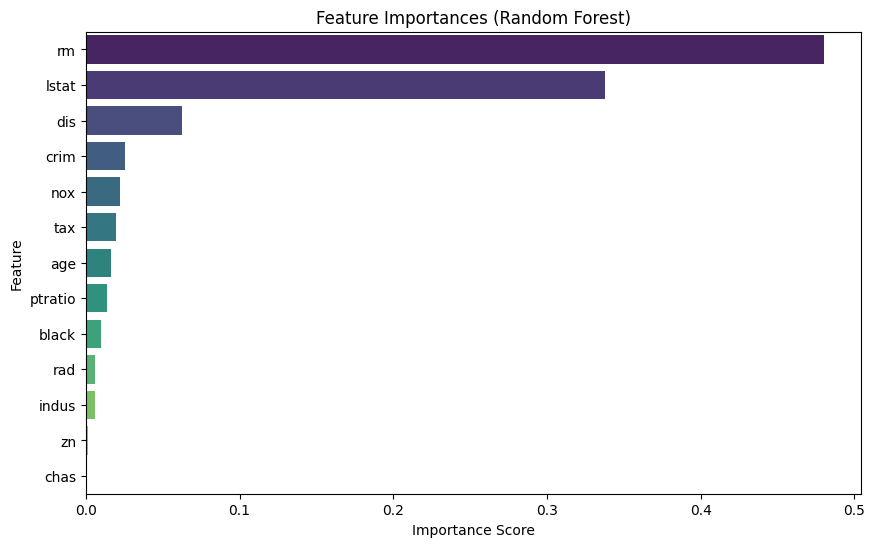

In [16]:
# Get feature importances from Random Forest
feature_importances = models['Random Forest'].feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]

# Visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[sorted_idx], y=X.columns[sorted_idx], palette='viridis')
plt.title('Feature Importances (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

# Step 7: Residual Analysis


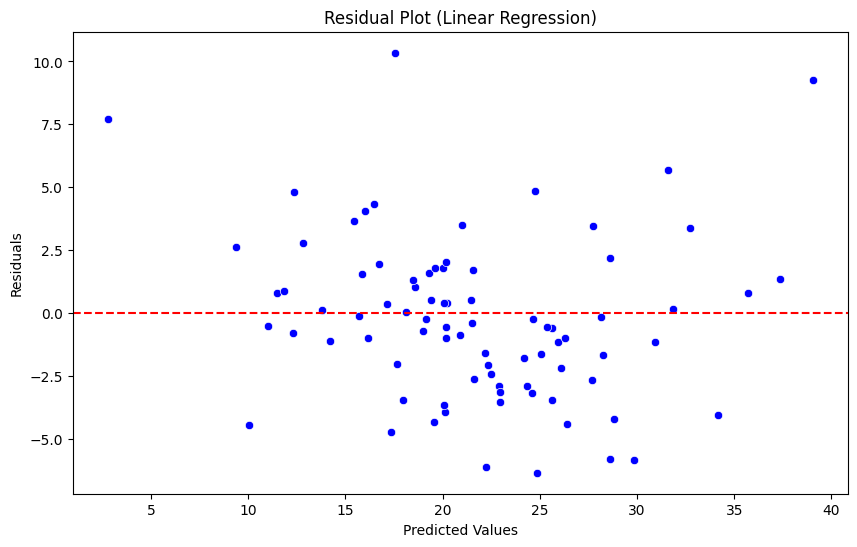

In [17]:
# Residual analysis for Linear Regression
lr_pred = models['Linear Regression'].predict(X_test_scaled)
residuals = y_test - lr_pred

plt.figure(figsize=(10, 6))
sns.scatterplot(x=lr_pred, y=residuals, color='blue')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot (Linear Regression)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()